# Life Expectancy and GDP
Written by TheJJSerg, Sug900, Fernando, and CalvinTheMechanic

This is a Codecademy Portfolio Project to use data visualization to analyze and plot data from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

We will analyze, prepare, and plot data in order to answer questions in a meaningful way. After our analysis, we will be creating a blog post to share our findings on the World Health Organization website.

## Project Objectives
- Complete a project to add to our portfolio
- Use `seaborn` and `Matplotlib` to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

## Overview of the Data
The dataset, `all_data.csv`, contains the following columns:
- **Country**: nation for a specific observation
- **Year**: the year for the observation
- **Life expectancy at birth (years)**: the life expectancy value in years
- **GDP**: Gross Domestic Product in U.S. dollars

## Method and Analysis
1. Data Loading and Tiding
2. Data Analsyis
3. Data Visualization
4. Others

1. Data Loading and Tiding

In [1]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read csv file into a dataframe
gdp_data = pd.read_csv('all_data.csv')

#print the first 5 rows
print('HEAD OF THE DATAFRAME:')
print('======================')
print(gdp_data.head(),"\n")

#print the info of the df and main stats of the variables
print('INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:')
print('=================================================================')
print(gdp_data.info(), "\n")
print('DESCRIPTION ABOUT THE DATA:')
print('===========================')
print(gdp_data.describe(include='all'), "\n")
#reduce life expectancy variable name

gdp_data.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace=True)
print('DATAFRAME RENAMED:')
print('===========================')
print(gdp_data.head())

HEAD OF THE DATAFRAME:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memor

* The data contains 96 entries with no null values
* The data types are correct as the `Country` variable is a string while the `Life expectancy at birth (years)` and `GDP` are float. The `Year` variable is an integer
* The data shows no issues with missing data or wrong entries 
* The `Life expectancy at birth (years)` variable was renamed to `Life`

We will visualize the data.

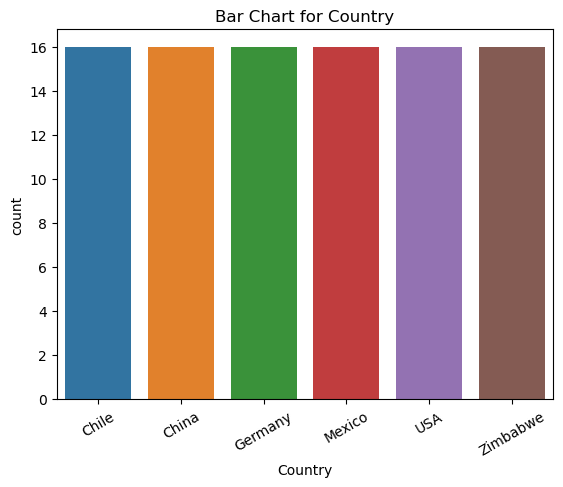

In [2]:
# Create a Bar Chart for Country
sns.countplot(x = "Country", data = gdp_data)

# Create an axes object
ax = plt.subplot()
# Set the x-tick position using a list of numbers by the length of unique Countries
ax.set_xticks(range(len(gdp_data["Country"].unique()))) 
ax.set_xticklabels(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"], rotation = 30)

# Create labels for the plot
plt.title("Bar Chart for Country")

# Show and close the plot
plt.show()
plt.close()

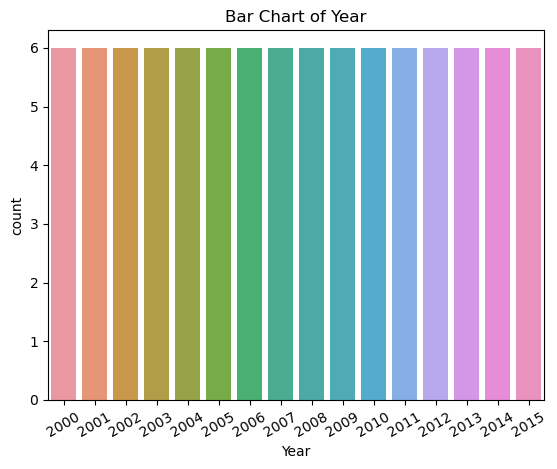

In [3]:
# Create a Bar Chart for Year
sns.countplot(x = "Year", data = gdp_data)

# Create an axes object
ax = plt.subplot()
# Set the x-tick position using a list of numbers by the length of unique Years
ax.set_xticks(range(len(gdp_data["Year"].unique()))) 
# Set the x-tick labels and rotate them by 30 degrees
ax.set_xticklabels(gdp_data["Year"].unique(), rotation = 30)

# Create labels for the chart
plt.title("Bar Chart of Year")

# Show and close the plot
plt.show()
plt.close()

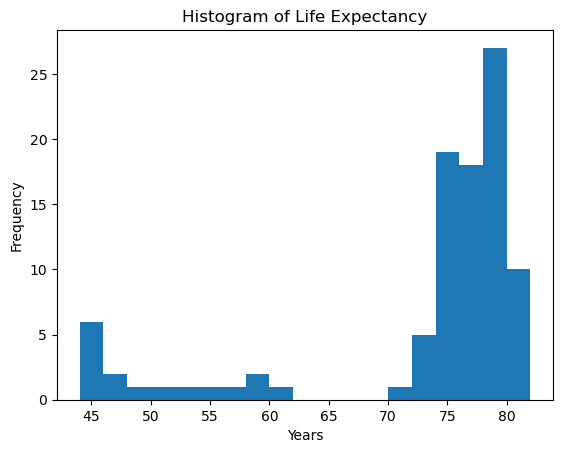

In [4]:
# Create a histogram of Life Expectancy
plt.hist(gdp_data["Life"], 
         range = (44, 82), # range is the int before and after the min and max
         bins = 19) # bins = range/2

# Create labels for the plot
plt.title("Histogram of Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Show and close the plot
plt.show()
plt.close()

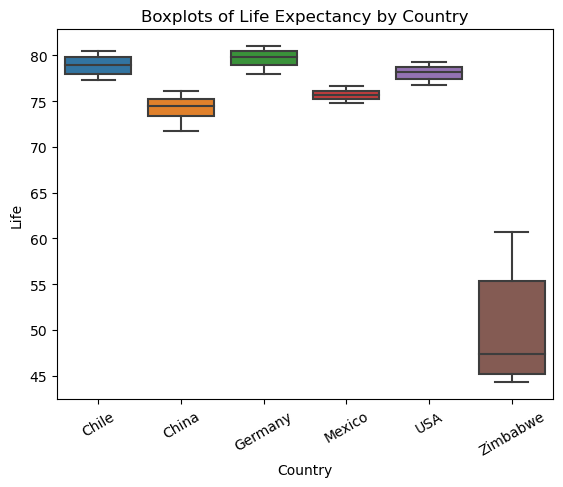

In [5]:
# Create boxplots of life expectancy and country
sns.boxplot(x = "Country", y = "Life", data = gdp_data)

# Create an axes object
ax = plt.subplot()
# Set the x-tick position using a list of numbers by the length of unique Years
ax.set_xticks(range(len(gdp_data["Country"].unique()))) 
# Set the x-tick labels and rotate them by 30 degrees
ax.set_xticklabels(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"], 
                   rotation = 30)

# Create labels for the plot
plt.title("Boxplots of Life Expectancy by Country")

# Show and close the plot
plt.show()
plt.close()

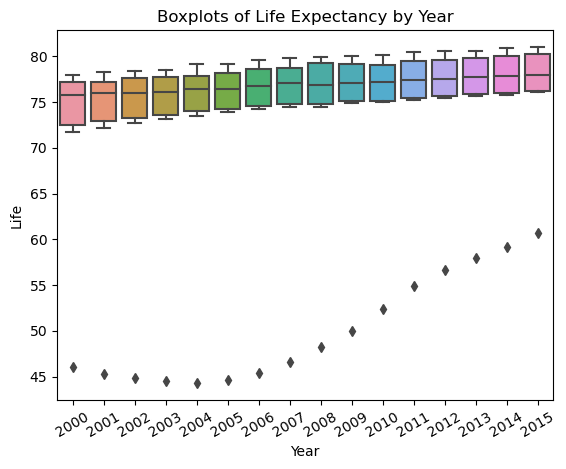

In [6]:
# Create boxplots of life expectancy and year
sns.boxplot(x = "Year", y = "Life", data = gdp_data)

# Create an axes object
ax = plt.subplot()
# Set the x-tick position using a list of numbers by the length of unique Years
ax.set_xticks(range(len(gdp_data["Year"].unique()))) 
# Set the x-tick labels and rotate them by 30 degrees
ax.set_xticklabels(gdp_data["Year"].unique(), rotation = 30)

# Create labels for the plot
plt.title("Boxplots of Life Expectancy by Year")

# Show and close the plot
plt.show()
plt.close()

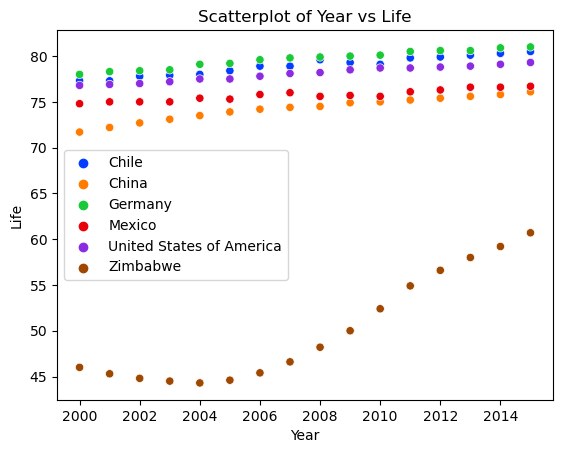

In [7]:
# Create a scatterplot Year vs Life Expectancy
sns.scatterplot(x = "Year", y = "Life", hue = "Country", 
                palette = "bright", data = gdp_data)

# Create labels for the plot
plt.title("Scatterplot of Year vs Life")
plt.legend()

# Show and close the plot
plt.show()
plt.close()

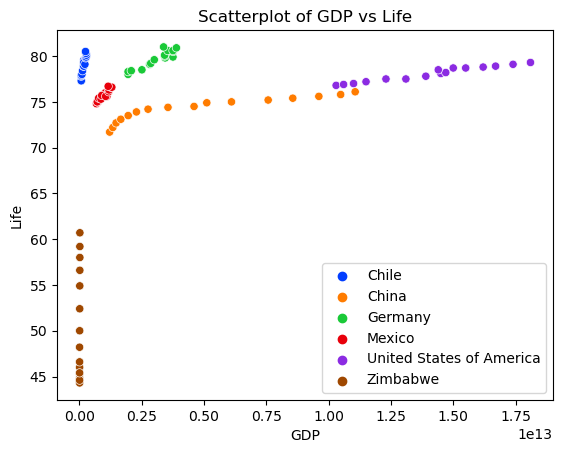

In [11]:
# Create a scatterplot Year vs Life Expectancy
sns.scatterplot(x = "GDP", y = "Life", hue = "Country", 
                palette = "bright", data = gdp_data)

# Create labels for the plot
plt.title("Scatterplot of GDP vs Life")
plt.legend()

# Show and close the plot
plt.show()
plt.close()

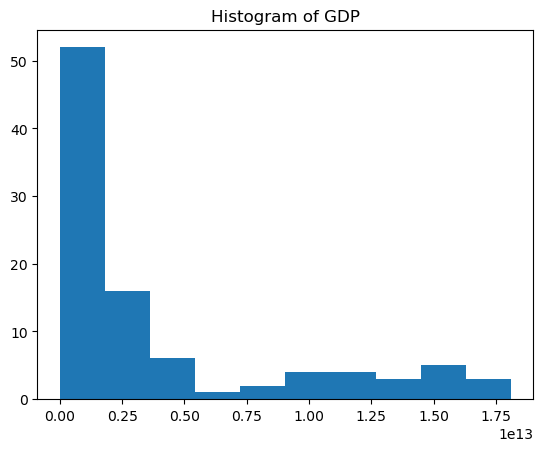

In [10]:
# Create a histogram of gdp
plt.hist(gdp_data["GDP"])

# Create labels for the plot
plt.title("Histogram of GDP")

# Show and close the plot
plt.show()
plt.close()

In [8]:
gdp_data.head()

,Country,Year,Life,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
